In [1]:
import sys 
sys.path.append("source")

import pandas
from pss2dataframe import create_dataframe
from PIL import Image
import numpy as np
import pandas as pd
import logging
import glob
import os
import matplotlib.pyplot as plt
import pickle as pkl
logger = logging.getLogger()
logger.setLevel(100)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [2]:
N = 4
K = 4
M = 7

In [3]:
path = "save/*"
hvs_path = glob.glob(path)
hvs_path.sort()

In [17]:
cmn = "/0000/img/*"

In [18]:
hvs_path = [i+cmn for i in hvs_path]

In [20]:
def squared(image,i):
    if   i == 0:
        return image[:256,:256]
    elif i == 1:
        return image[:256,256:]
    elif i == 2:
        return image[256:,:256]
    else:
        return image[256:,256:]

In [21]:
df_list = []
filename_list = []
for ind, hv_path in enumerate( hvs_path ):
    hv = hv_path[5:12] # extract hv id 
    print("{:6}/{:6}".format(ind,len(hvs_path)),end="\r")
    
    imgs_path = glob.glob(hv_path)
    imgs_path.sort()
    image = Image.open(imgs_path[-1]).convert("L")
    
    for i in range(4):
            image_4 = squared( np.array(image) ,i)
            Image.fromarray( image_4 ).save("targets/{}.png".format(hv))
            df_list.append( create_dataframe( image_4,N,K,M ) )
            tmpname = str(i)+os.path.basename(hv).replace(".png","")
            filename_list.append( tmpname )

all_df = pd.concat( df_list ,axis=0)
tuples = list(zip( *[filename_list] ))
indexes = pd.MultiIndex.from_tuples(tuples,names=["file_name"])
all_df.set_index(indexes,inplace=True)

In [23]:
df_pss_st = all_df.apply(lambda x: (x - x.mean() )/x.std(),axis=0) 
statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]

In [24]:
df_mean = np.zeros([100,782])
for i in range(100):
    df_mean[i] = df_pss_st.iloc[i*4:(i+1)*4].mean()
df_pss_st.iloc[:100] = df_mean
df_pss_st= df_pss_st.iloc[:100]

In [25]:
df_distance_dict = {}
for static_name in statics:
    df_tmp = df_pss_st.loc[:,static_name]
    df_square =  (df_tmp - df_tmp.iloc[-1])**2
    distance = np.sqrt(df_square.sum(axis=1))
    df_distance_dict[static_name] = distance.values

In [26]:
for sname in statics:
    plt.title(sname)
    plt.plot(df_distance_dict[sname])
    plt.savefig(sname+".png")
    plt.clf()

<Figure size 432x288 with 0 Axes>

In [29]:
datalen = df_pss_st.shape[0]

In [30]:
euclid_distance = []
for i in range(datalen):
    print("{:3}/{:3}".format(i,datalen),end="\r")
    euclid_distance.append( (df_pss_st - df_pss_st.iloc[i])**2 )

In [32]:
euclid_distance_dict = {}
for static in statics:
    tmp = np.zeros([datalen,datalen])
    for i in range(datalen):
        tmp[i] = euclid_distance[i].loc[:,(static)].mean(axis=1)
    euclid_distance_dict[static] = tmp

NameError: name 'euclid_distance_dict' is not defined

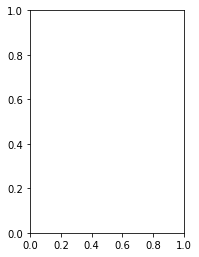

In [31]:
plt.figure(figsize=(16,9))
for i,static in enumerate(statics):
    plt.subplot(2,5,i+1)
    plt.imshow(euclid_distance_dict[static])
    #plt.colorbar()
    plt.title(static)
plt.savefig("static_distance.png")

In [40]:
# 3枚だけ

In [4]:
from pss2dataframe import create_dataframe
from PIL import Image
import numpy as np
import pandas as pd
import logging
import glob
import os
import matplotlib.pyplot as plt
logger = logging.getLogger()
logger.setLevel(100)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [6]:
N = 4
K = 4
M = 7

In [7]:
image_list = glob.glob("original/*.png")
image_list.sort()

In [8]:
df_list = []
filename_list = []
for ind, file_name in enumerate( image_list ):
    print(ind , end="\r")
    image = Image.open(file_name)
    image = np.array(image)
    df_list.append( create_dataframe(image,N,K,M) )
    filename_list.append( os.path.basename(file_name).replace(".png","") )

all_df = pd.concat( df_list ,axis=0)
tuples = list(zip( *[filename_list] ))
indexes = pd.MultiIndex.from_tuples(tuples,names=["file_name"])
all_df.set_index(indexes,inplace=True)

In [9]:
df_pss_st = all_df.apply(lambda x: (x - x.mean() )/x.std(),axis=0) 
statics = ["IM_MAR","CF_MAR","BND_MMAR","CF_CA","BND_MCOR","CF_COUS","CF_CPAR","CF_RCOU","CF_RPAR","H0_PRO"]

euclid_distance = []
for i in range(12):
    euclid_distance.append( (df_pss_st - df_pss_st.iloc[i])**2 )
    
euclid_distance_dict = {}
for static in statics:
    tmp = np.zeros([12,12])
    for i in range(12):
        tmp[i] = euclid_distance[i].loc[:,(static)].mean(axis=1)
    euclid_distance_dict[static] = tmp

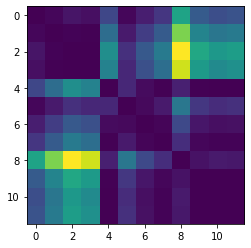

In [10]:

for i,static in enumerate(statics):
    plt.imshow(euclid_distance_dict[static])
    plt.savefig("{}.svg".format(static))

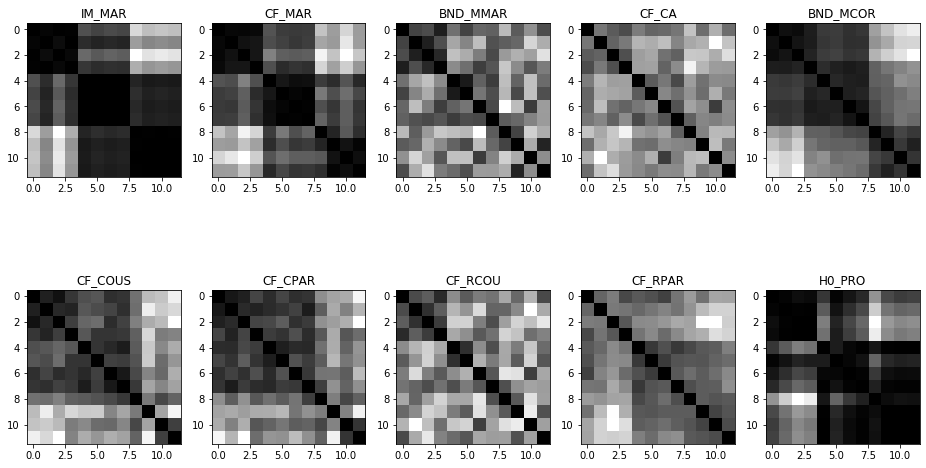

In [11]:
plt.figure(figsize=(16,9))
for i,static in enumerate(statics):
    plt.subplot(2,5,i+1)
    plt.imshow(euclid_distance_dict[static],"gray")
    #plt.colorbar()
    plt.title(static)
plt.savefig("static_distance.svg")